<a href="https://colab.research.google.com/github/justinwickelgren/data-science-class/blob/main/Unit_6_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No. elpd_loo is only meaningful relative to the elpd_loo value of another model.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when a model is distracted by unnecessary information. The model learns the data it is based on too well and becomes only capable of predicting that data, not understanding the underlying process.

**Task3**:

How do we mitigate overfitting?

We can reduce the risk of overfitting by using the smallest possible number of variables to predict the process. Adding extraneous variables will cause the model to be distracted by them rather than the variables that are actually relevant. Additionally, weakly informative priors will help reduce overfitting.

**Task4**:

How do we mitigate underfitting?

We mitigate underfitting by using elpd_loo to evaluate the model's accuracy. By choosing the model with the best elpd_loo value, we ensure it is not underfitted.

**Task5**:

Why would we want more than one predictor in a model?

We would want more than one predictor because it could improve the accuracy. Many things we might want to predict are  correlated with multiple potential predictors. For example, if we are trying to predict cancer risk, we might use tobacco smoking frequency as a predictor. However, if we added a predictor for alcohol consumption, which is also correlated with cancer, the model would be more accurate. This is especially true when the different predictors are not correlated with each other but both correlated with the thing being predicted, such as many people who only smoke or only drink but still have an elevated risk of cancer.

**Task6**:

Can we have too many predictors? How would we now?

We can have too many predictors. We would know because too many predictors can cause overfitting. If our model doesn't match our understanding of the underlying process but still matches the data well, it is likely overfitted. For example, if we were predicting SAT score, and the day of the week someone is born is one of the predictors, it is likely an unnecessary predictor because our understanding of the process suggests that it would not make sense for those two things to be correlated.

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process of deciding which predictors to use and how many predictors to use. It works by balancing the risk of overfitting and underfitting. We want to select as few variables as possible to accurately predict the process, which will help avoid overfitting. Conversely, we want to ensure we don't miss out on accuracy by omitting an important variable, which is key to avoiding underfitting.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

The first option produces the same slope for all categories in the categorical variable (but the intercepts can be different, producing different lines). The second option allows the slopes for the different categories to be different. The third option is similar to the second option, because it allows the model to detect that the non-categorical variable is different for different categories by showing how the two interact.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We cannot visualize the entire model in one graph because there are more predictors and predicted values than dimensions we can display. We can display a 2D graph for all predictors but one at a fixed value and then see the relationship between that one predictor and the predicted value with the other values fixed. We can also use posterior predictive check and elpd_loo charts, but those are more useful for comparing models than visualizing them on their own.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [5]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.3 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [7]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [10]:
ft_pos_cat = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [11]:
ft_pos_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 22 divergences after tuning. Increase `target_accept` or reparameterize.


In [12]:
ft_pos_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [18]:
ft_pos_3pt_inter = bmb.Model("`FGp` ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [20]:
ft_pos_3pt_inter2 = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

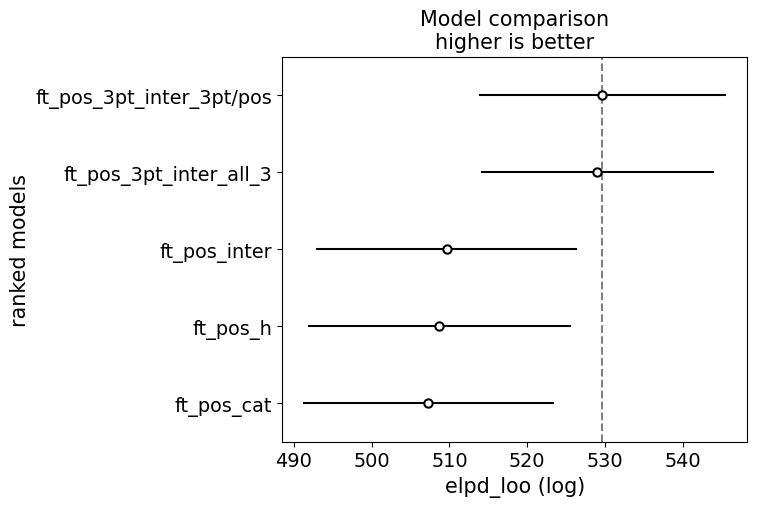

In [21]:
compare = az.compare({"ft_pos_cat":ft_pos_cat, "ft_pos_h":ft_pos_h, "ft_pos_inter":ft_pos_inter, "ft_pos_3pt_inter_all_3":ft_pos_3pt_inter, "ft_pos_3pt_inter_3pt/pos":ft_pos_3pt_inter2})
az.plot_compare(compare)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

The models with three point attempts in them are better than the ones without them. Those two models are roughly equal, but the one with only interactions between 3PA and Pos is better than the one with interactions between all three predictors. I think that those two models are better because players who shoot more three point attempts are likely better at shooting in general, including free throws. This is because shooting more three point attempts likely improves your shooting ability and if you aren't very good at shooting you're less likely to attempt three pointers.